In [1]:
# %pip install pandas seaborn pingouin

In [2]:
import pandas as pd
import pingouin as pg
import seaborn as sns

## Using Data Science Notebooks to Report Analysis Results




Data science notebooks, like Jupyter Notebooks, have changed how researchers do and share their work. These notebooks let you mix code, data, and text in one place. This helps researchers explain their methods and show their results clearly. You can include code, text, equations, charts, and even videos. This makes it easier to share complex ideas with others, like peers, reviewers, and the public.

One big benefit of data science notebooks is that they help make research reproducible. Reproducibility means that others can repeat your work and get the same results. Notebooks save the whole process of your analysis, from data cleaning to final results. By sharing the notebook, you give others everything they need to repeat your study, including the exact code and outputs. This builds trust in your findings and helps others build on your work.

In this notebook, we'll try out the following Python packages, doing a few analyses and showing their results right next to the code:
  -  `pandas`: Makes it simple to reference variables in a study and show a table of the data, 
  - `seaborn`: Makes it simple to make plots from pandas tables,
  - `pingouin`: Makes nice statistical tables from pandas tables.

### Our Dataset: The Passengers on the Titanic

below, we load the data.  Every row is a passenger, every column is a variable about that passenger.  Please run the code and take a look at the dataset.  We'll use it in the next two sections.

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/mwaskom/seaborn-data/refs/heads/master/titanic.csv')
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


## Reporting Statistics using the Pingouin Package and Visualizing Data with the Seaborn Package


|  Code  | Description |
| :-- | :-- |
| **`import pingouin as pg`**  | Imports the (already-installed) package.  Can be called starting with `pg.<function_name>` |
| **`pg.anova(data=df, dv='measurement_variable', between='group_variable', detailed=True)`** | Do a simple ANOVA between N groups of people |
| **`pg.pairwise_tukey(data=df, dv='measurement_variable', between='group_variable')`** | Do pairwise t-tests on all combinations of the grouping variable |
| **`import seaborn as sns`** | Load the (already-installed) `seaborn` package.  Its functions can be used by starting with `sns.<function_name>` |
| **`sns.barplot(data=df, x='Group Variable', y='Measurement Variable', hue='An Extra Measurement Variable')`** | Make a bar plot of the data. |


**Exercises**

**Example: Was there a significant difference in mean passenger age between each passenger class?**

ANOVA to check if a difference exists anywhere between the groups:

In [4]:
pg.anova(df, between='class', dv='age', )

,Source,ddof1,ddof2,F,p-unc,np2
0,class,2,711,57.443484,7.487984e-24,0.139107


T-Tests to compare values between all combinations between the groups (i.e. if I'm comparing one class against another with a t-test, will I see a significant difference?)

In [5]:
pg.pairwise_tukey(df, between='class', dv='age', )

,A,B,mean(A),mean(B),diff,se,T,p-tukey,hedges
0,First,Second,38.233441,29.87763,8.355811,1.425650,5.861051,2.109710e-08,0.578156
1,First,Third,38.233441,25.14062,13.092821,1.221725,10.716671,0.000000e+00,0.980658
2,Second,Third,29.877630,25.14062,4.737010,1.251483,3.785116,4.884441e-04,0.363671


Make a bar plot to show the mean value of each group:

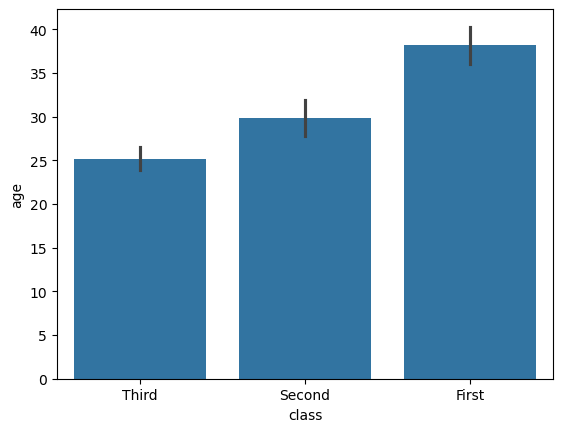

In [6]:
class_order = ['Third', 'Second', 'First']
sns.barplot(df, x='class', y='age', order=class_order);

**Was there a significant difference in mean fare between each passenger class?**

ANOVA to check if a difference exists anywhere between the groups:

In [7]:
pg.anova(data=df, dv='fare', between='class', detailed=True)

,Source,SS,DF,MS,F,p-unc,np2
0,class,7.760301e+05,2,388015.028289,242.344157,1.031376e-84,0.353094
1,Within,1.421769e+06,888,1601.090919,NaN,NaN,NaN


T-Tests to compare values between all combinations between the groups (i.e. if I'm comparing one class against another with a t-test, will I see a significant difference?)

In [8]:
pg.pairwise_tukey(df, between='class', dv='fare', )

,A,B,mean(A),mean(B),diff,se,T,p-tukey,hedges
0,First,Second,84.154687,20.662183,63.492504,4.014230,15.816859,0.000000,1.086596
1,First,Third,84.154687,13.675550,70.479137,3.267007,21.572998,0.000000,1.586241
2,Second,Third,20.662183,13.675550,6.986633,3.458679,2.020029,0.107983,0.569905


Make a bar plot to show the mean value of each group:

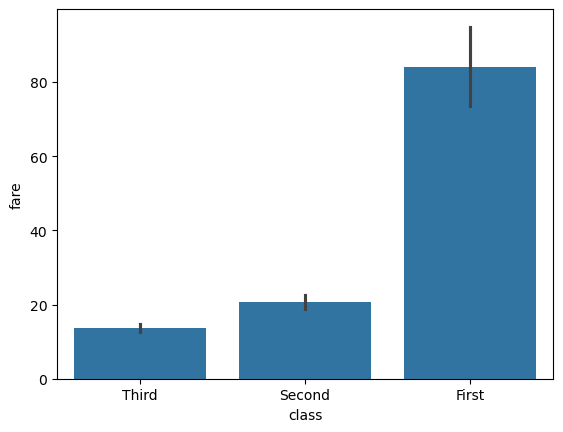

In [9]:
class_order = ['Third', 'Second', 'First']
sns.barplot(df, x='class', y='fare', order=class_order);

**Was there a significant difference in survival rate between each passenger class?**

ANOVA to check if a difference exists anywhere between the groups:

In [10]:
pg.anova(data=df, dv='survived', between='class', detailed=True)

,Source,SS,DF,MS,F,p-unc,np2
0,class,24.333912,2,12.166956,57.964818,2.183247e-24,0.115476
1,Within,186.393360,888,0.209902,NaN,NaN,NaN


T-Tests to compare values between all combinations between the groups (i.e. if I'm comparing one class against another with a t-test, will I see a significant difference?)

In [11]:
pg.pairwise_tukey(df, between='class', dv='survived', )

,A,B,mean(A),mean(B),diff,se,T,p-tukey,hedges
0,First,Second,0.629630,0.472826,0.156804,0.045962,3.411559,1.950021e-03,0.318282
1,First,Third,0.629630,0.242363,0.387267,0.037407,10.352847,0.000000e+00,0.866482
2,Second,Third,0.472826,0.242363,0.230464,0.039601,5.819575,2.468457e-08,0.512058


Make a bar plot to show the mean value of each group:

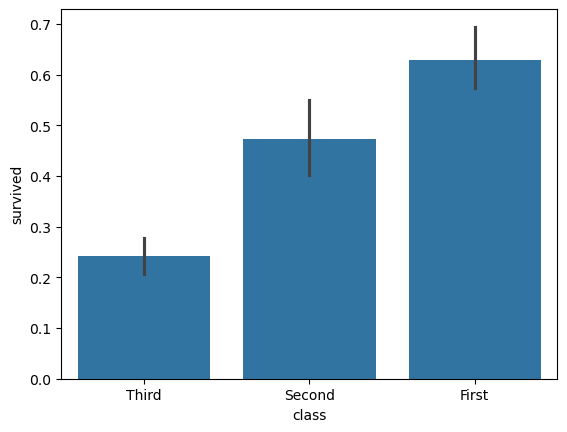

In [12]:
class_order = ['Third', 'Second', 'First']
sns.barplot(df, x='class', y='survived', order=class_order);

Extra bar plot, just for fun: What was the survival rate, broken down by both sex and class? (hint: `hue=`)

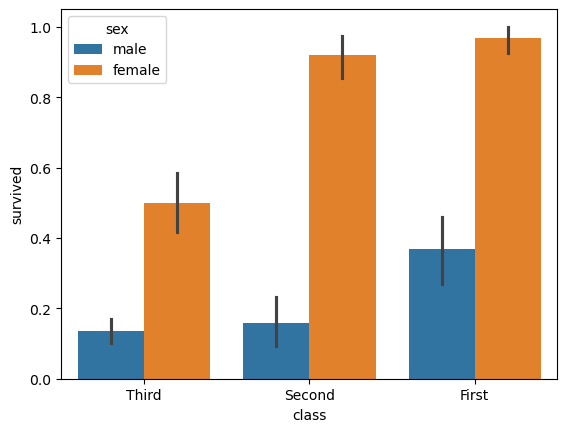

In [13]:
class_order = ['Third', 'Second', 'First']
sns.barplot(df, x='class', y='survived', order=class_order, hue='sex');